In [1]:
import pandas as pd
import numpy  as np 

In [3]:
front = pd.read_csv('Front.csv')

In [5]:
back = pd.read_csv('Back.csv')
top = pd.read_csv('Top.csv')

In [7]:
front

,Height from Base,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity
0,50,370,26,26
1,80,370,26,26
2,110,370,26,26
3,140,370,26,26
4,170,370,26,26
5,200,370,26,26
6,230,368,24,26
7,260,372,28,26
8,290,366,22,26


In [9]:
back

,Height from Base,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity
0,50,314,-30,26
1,80,320,-24,26
2,110,318,-26,26
3,140,318,-26,26
4,170,314,-30,26
5,200,314,-30,26
6,230,312,-32,26
7,260,312,-32,26
8,290,368,24,26


In [11]:
top

,distance from front line,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity
0,20,302,-42,26
1,50,300,-44,26
2,80,302,-42,26
3,110,310,-34,26
4,140,320,-24,26


In [13]:
def calculate_coefficients(data):
    data['Cp'] = (data['Ps-Pinfinity (in mm H2O)']) / (data['P0-Pinfinity'])

    angles = np.deg2rad(np.linspace(0, 360, len(data)))
    p = data['Cp'].values
    
    return data

In [15]:
processed_data_front = calculate_coefficients(front)
processed_data_back = calculate_coefficients(back)
processed_data_top= calculate_coefficients(top)

In [17]:
processed_data_front

,Height from Base,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity,Cp
0,50,370,26,26,1.000000
1,80,370,26,26,1.000000
2,110,370,26,26,1.000000
3,140,370,26,26,1.000000
4,170,370,26,26,1.000000
5,200,370,26,26,1.000000
6,230,368,24,26,0.923077
7,260,372,28,26,1.076923
8,290,366,22,26,0.846154


In [19]:
processed_data_back

,Height from Base,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity,Cp
0,50,314,-30,26,-1.153846
1,80,320,-24,26,-0.923077
2,110,318,-26,26,-1.000000
3,140,318,-26,26,-1.000000
4,170,314,-30,26,-1.153846
5,200,314,-30,26,-1.153846
6,230,312,-32,26,-1.230769
7,260,312,-32,26,-1.230769
8,290,368,24,26,0.923077


In [21]:
processed_data_top

,distance from front line,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity,Cp
0,20,302,-42,26,-1.615385
1,50,300,-44,26,-1.692308
2,80,302,-42,26,-1.615385
3,110,310,-34,26,-1.307692
4,140,320,-24,26,-0.923077


In [23]:
front =processed_data_front
back =processed_data_back
top =processed_data_top

In [25]:


import numpy as np
import pandas as pd
U_inf = 20.406      
rho   = 1.225       
mu    = 1.798e-5    


Diameter = 0.16     # Cylinder diameter [m]
Height   = 0.305    # Cylinder height [m]


Re = (rho * U_inf * Diameter) / mu
print("Reynolds Number = {:.2e}".format(Re))


q = 0.5 * rho * U_inf**2
print("Dynamic Pressure, q = {:.2f} Pa".format(q))

A_ref = 0.305*0.02
print("Reference Area, A_ref = {:.4f} m^2".format(A_ref))

area_weight = 0.5  

front_df = processed_data_front
back_df  = processed_data_back
top_df   = processed_data_top

def compute_average_cp(df):
    if 'Height_from_Base' in df.columns:
        df_sorted = df.sort_values(by='Height_from_Base')
        x = df_sorted['Height_from_Base'].values
        cp_values = df_sorted['Cp'].values
        avg_cp = np.trapz(cp_values, x=x) / (x[-1] - x[0])
    else:
        avg_cp = df['Cp'].mean()
    return avg_cp

cp_front_avg = compute_average_cp(front_df)
cp_back_avg  = compute_average_cp(back_df)
cp_top_avg   = compute_average_cp(top_df)

print("\nAverage Cp values:")
print("  Front: {:.3f}".format(cp_front_avg))
print("  Back:  {:.3f}".format(cp_back_avg))
print("  Top:   {:.3f}".format(cp_top_avg))


F_drag = (cp_front_avg - cp_back_avg) * q * ( A_ref)
F_lift = cp_top_avg * q * ( A_ref)

print("\nEstimated Forces:")
print("  Drag Force, F_drag = {:.3f} N".format(F_drag))
print("  Lift Force, F_lift = {:.3f} N".format(F_lift))



C_D = F_drag / (q * A_ref)
C_L = F_lift / (q * A_ref)

print("\nEstimated Coefficients:")
print("  Drag Coefficient, C_D = {:.3f}".format(C_D))
print("  Lift Coefficient, C_L = {:.3f}".format(C_L))


Reynolds Number = 2.22e+05
Dynamic Pressure, q = 255.05 Pa
Reference Area, A_ref = 0.0061 m^2

Average Cp values:
  Front: 0.983
  Back:  -0.880
  Top:   -1.431

Estimated Forces:
  Drag Force, F_drag = 2.899 N
  Lift Force, F_lift = -2.226 N

Estimated Coefficients:
  Drag Coefficient, C_D = 1.863
  Lift Coefficient, C_L = -1.431


In [27]:
df = pd.read_csv('CD-CL.csv')

In [29]:
df


,Group Number,Reynold's Number (in 10^5),Cd,Cl
0,1,1.630,2.000,1.386
1,2,1.951,1.911,1.240
2,3,2.224,1.748,1.177
3,4,2.543,1.689,0.998


In [31]:
import matplotlib.pyplot as plt

In [32]:
def generate_plot(x_col,y_col,label,x_label,y_label,title,file_name,y_low,y_high):
    plt.plot(x_col, y_col, label=label, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.ylim(bottom=y_low,top = y_high)
    plt.grid(True)
    plt.savefig(file_name, dpi=300)
    plt.show()

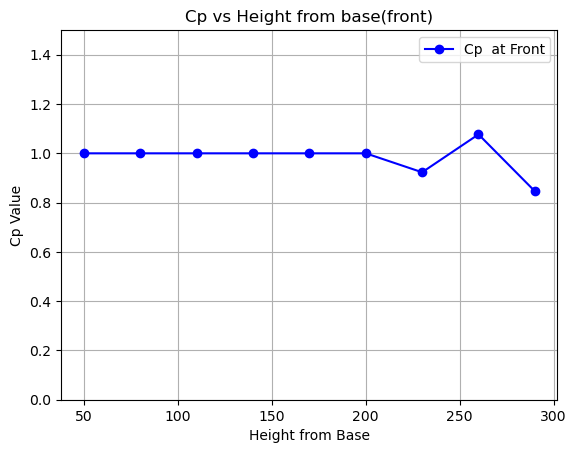

In [33]:
generate_plot(front['Height from Base'],front['Cp'],'Cp  at Front','Height from Base','Cp Value','Cp vs Height from base(front)','Cp_front.png',0,1.5)

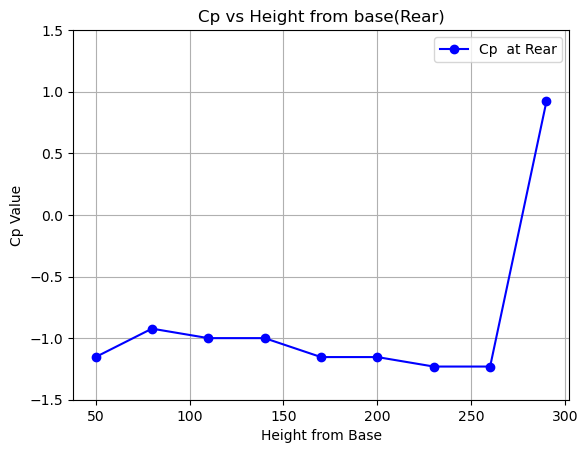

In [34]:
generate_plot(back['Height from Base'],back['Cp'],'Cp  at Rear','Height from Base','Cp Value','Cp vs Height from base(Rear)','Cp_back.png',-1.5,1.5)

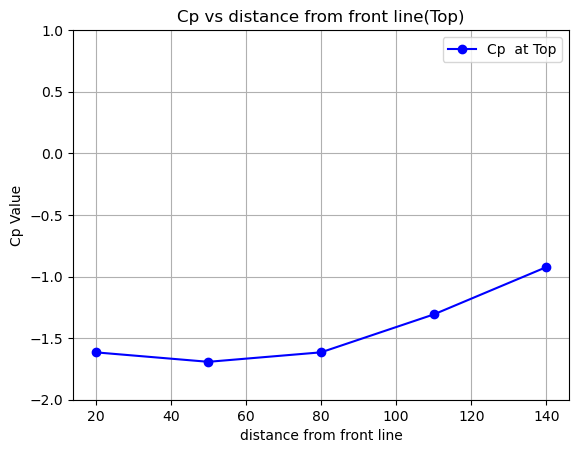

In [38]:
generate_plot(top['distance from front line'],top['Cp'],'Cp  at Top','distance from front line','Cp Value','Cp vs distance from front line(Top)','Cp_top.png',-2,1)

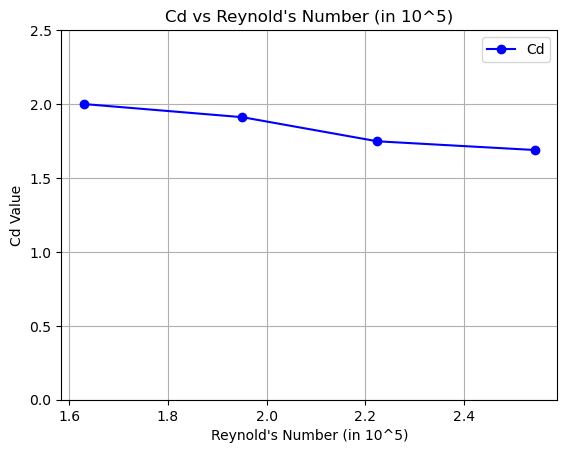

In [41]:
generate_plot(df["Reynold's Number (in 10^5)"],df['Cd'],'Cd',"Reynold's Number (in 10^5)",'Cd Value',"Cd vs Reynold's Number (in 10^5)",'CD.png',0,2.5)

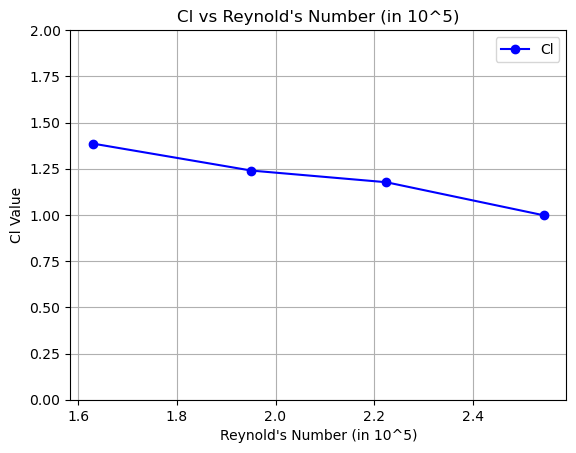

In [43]:
generate_plot(df["Reynold's Number (in 10^5)"],df['Cl'],'Cl',"Reynold's Number (in 10^5)",'Cl Value',"Cl vs Reynold's Number (in 10^5)",'CL.png',0,2)

In [45]:
front

,Height from Base,Ps,Ps-Pinfinity (in mm H2O),P0-Pinfinity,Cp
0,50,370,26,26,1.000000
1,80,370,26,26,1.000000
2,110,370,26,26,1.000000
3,140,370,26,26,1.000000
4,170,370,26,26,1.000000
5,200,370,26,26,1.000000
6,230,368,24,26,0.923077
7,260,372,28,26,1.076923
8,290,366,22,26,0.846154


In [70]:
import dataframe_image as dfi
import asyncio

async def export_df():
    await dfi.export_async(front, 'front.png')
await export_df()

In [72]:
import dataframe_image as dfi
import asyncio

async def export_df():
    await dfi.export_async(back, 'back.png')

# Run the async function
await export_df()

In [74]:
import dataframe_image as dfi
import asyncio

async def export_df():
    await dfi.export_async(top, 'top.png')

# Run the async function
await export_df()